In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

import sys
from paths import Paths
paths = Paths()
sys.path.append(paths.scripts_root)
import util

%load_ext autoreload
%autoreload 2

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

paths.print_paths()

Paths defined in paths module:
 paths.data_root: /Users/trafferty/data
 paths.notebook_root: /Users/trafferty/data/notebooks
 paths.scripts_root: /Users/trafferty/data/scripts
 paths.images_root: /Users/trafferty/data/images
 paths.projects_root: /Users/trafferty/data/projects
 paths.results_root: /Users/trafferty/data/results
 paths.tmp_root: /Users/trafferty/data/tmp
 paths.dat_root: /Users/trafferty/data/dat
 paths.tmp_dir: /Users/trafferty/tmp
 paths.ws_dir: /Users/trafferty/workspace
 paths.mii_home: /Users/trafferty/dev
 paths.inhouse: /Users/trafferty/dev/src/inhouse


In [79]:
fig_small = (200,10)
fig_med = (200,20)
fig_large = (200,60)

In [77]:
# Oce settings
nozzlePitch = 0.0021167
max_jets = 856
pixelsPerByte = 2
bytesPerColumn = max_jets/pixelsPerByte
colCount = 1352
swatheCount = 2

totalSize = bytesPerColumn * (swatheCount*colCount)
print(f"Total size of expected buffer: {totalSize}")


RowCount = 856
ColCount = 947
cols = colCount
rows = int(bytesPerColumn * pixelsPerByte)
print(f"Image will be {cols}x{rows} = {cols*rows} pels" )

Total size of expected buffer: 1157312.0
Image will be 1352x856 = 1157312 pels


In [55]:
swatheCols = (colCount - ColCount) / 2.0
swatheCols / nozzlePitch

95667.78475929513

In [56]:
pattern_root = paths.tmp_dir + '/patterns'

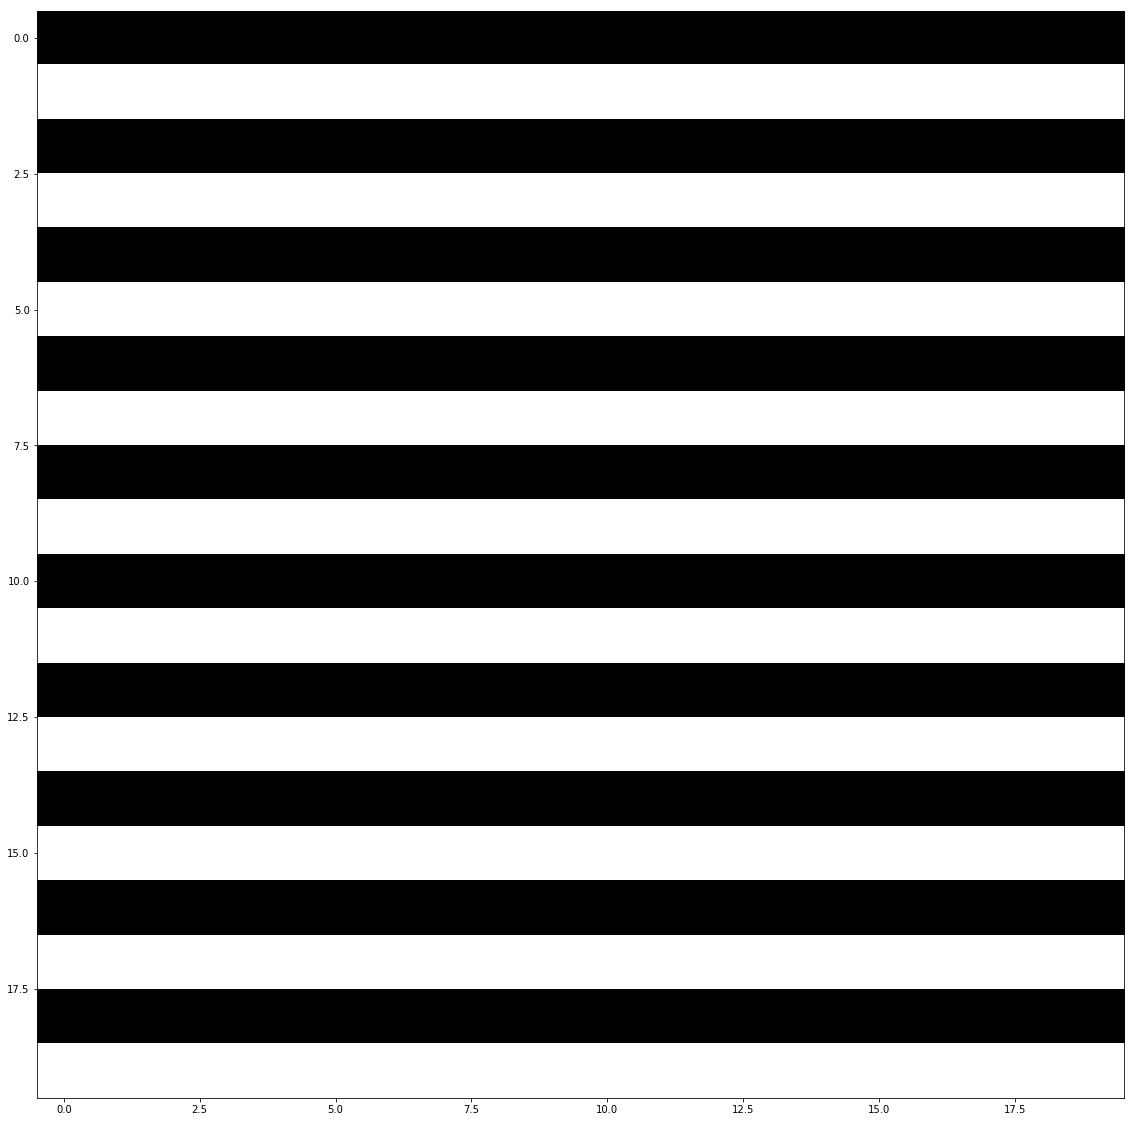

In [89]:
pat_file = f"{pattern_root}/20190410-103135_BitMap_1.dat"

# with open(pat_file, 'rb') as pfile:
#     pat = pfile.read()
pat = np.fromfile(pat_file, dtype='bool').reshape(cols,rows)
pat.shape

pat[int(cols/2),:] = 1

plt.figure(figsize = fig_med)
plt.imshow(pat[100:120,100:120], cmap='gray')
#plt.show()


In [60]:
pat = np.fromfile(pat_file, dtype='bool')
byte_cnt = pat.shape[0]
print(f"byte_cnt: {byte_cnt}")

byte_cnt: 1157312


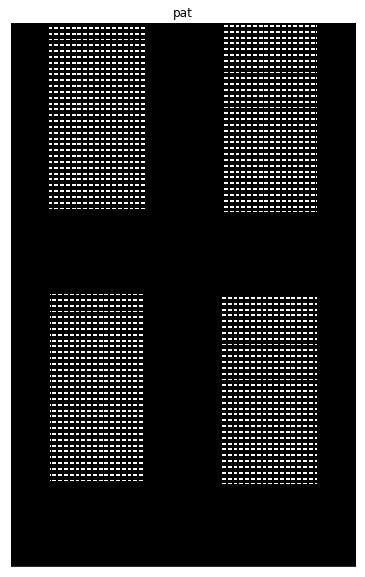

In [47]:
util.plot_imgs([(pat,'pat')], max_cols = 1)

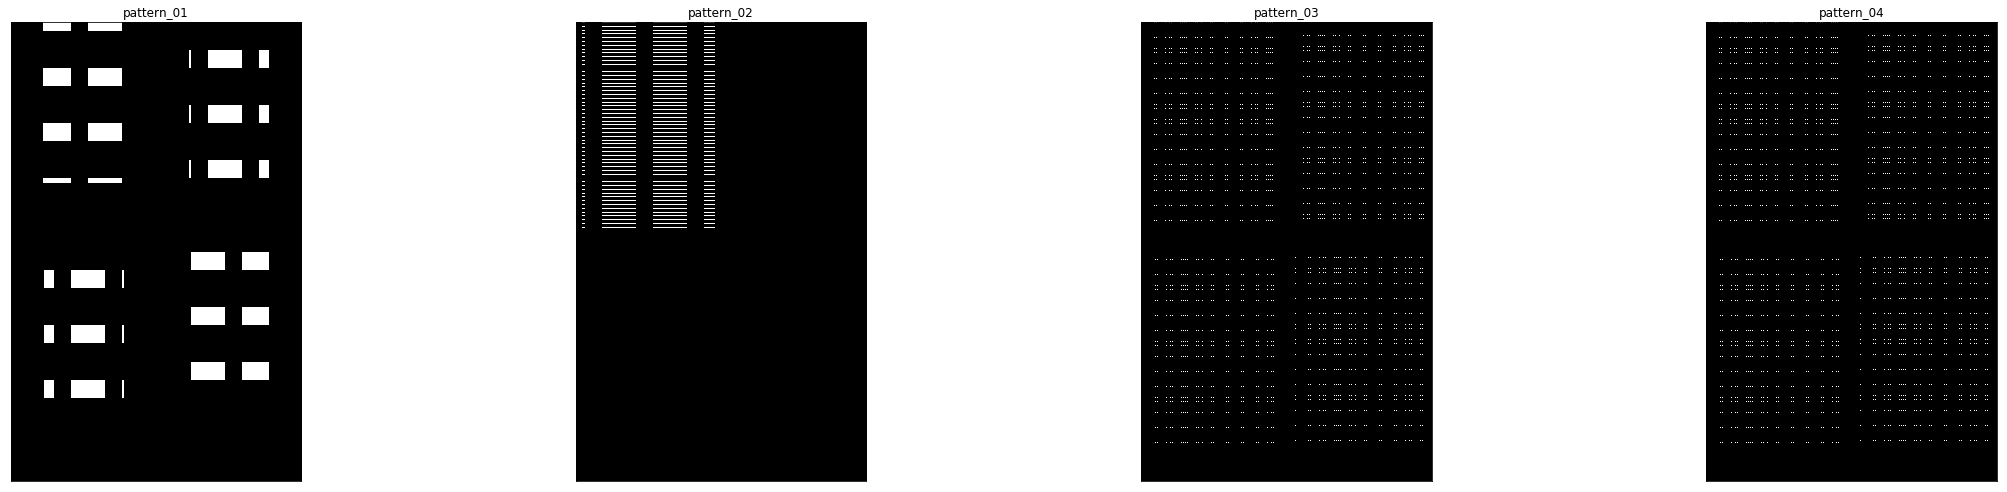

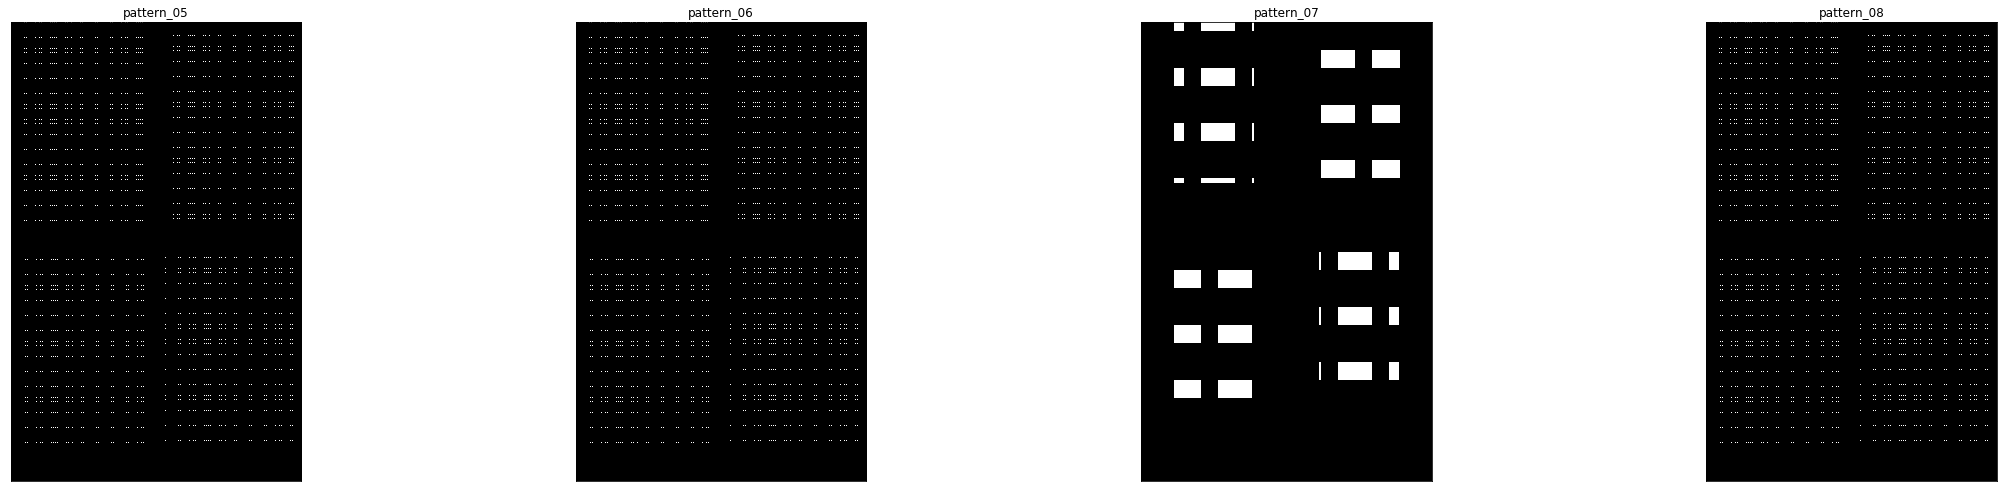

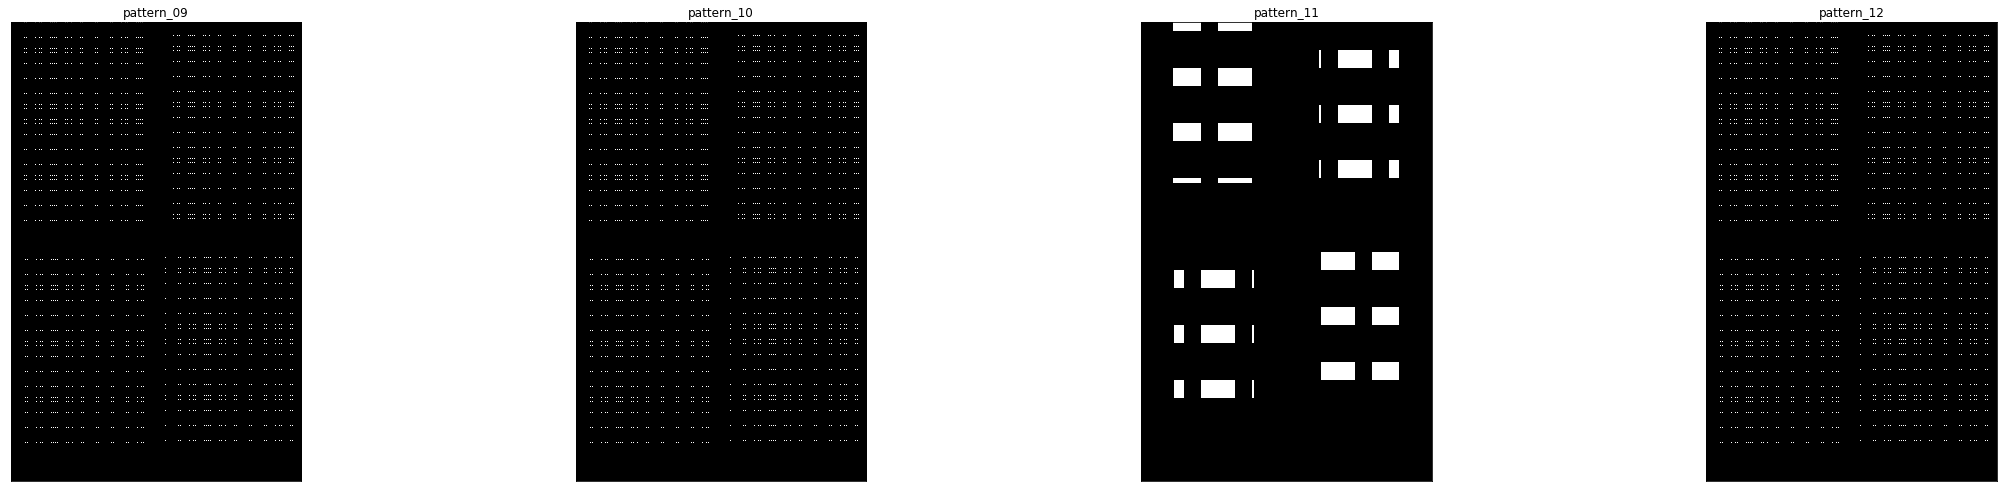

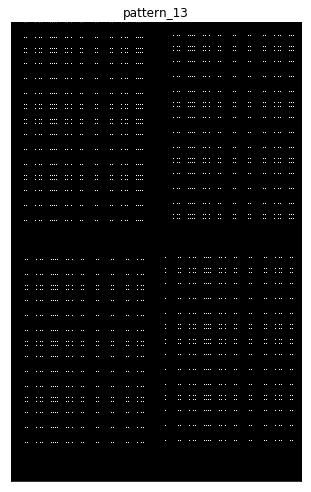

In [27]:
img_lst = []
for idx in range(1,14):
    pat_file = f"{pattern_root}/pattern_{idx:02}.dat"
    pat = np.fromfile(pat_file, dtype='bool').reshape(rows,cols)
    img_lst.append( (pat, f'pattern_{idx:02}') )

util.plot_imgs(img_lst, max_cols = 4)